# Assignment from Numerical Fluid Dynamics MIT_Opencourseware regarding effective wavenumber

In [1]:
import numpy as np
from matplotlib import pyplot

kx = np.linspace(0,np.pi,100)
y = (2*np.cos(kx) - 2)*-1
yy = (8/3*np.cos(kx)  - 1/6*np.cos(2*kx) -5/2)*-1
yyy = 6*(2*np.cos(kx)-2)/(-np.cos(kx)-5)
pyplot.plot(kx, y,    label = '2nd-CD')
pyplot.plot(kx, yy,   label = '4th-CD')
pyplot.plot(kx, yyy,  label = '4th-Pade')
pyplot.xlabel('kdx')
pyplot.ylabel('k^2dx^2')

pyplot.legend()




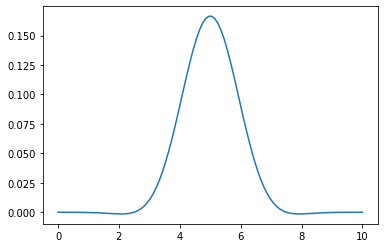

In [24]:
# 2nd order cental time and 2nd order central spatial 
# From MIT Opencourseware Numerical Fluid Mechanics
import numpy as np
from matplotlib import pyplot

L = 10 
T = 10  
c= 1.4 
N = 100 
h = L/N
M = 400 
k = T/M  
C = c*k/h 
Lf = 0.5
x = np.linspace(0,L,N)
t = np.linspace(0,T,M)
u = np.zeros(N)
un = np.zeros(N)


f = lambda x: np.exp(-0.5*(5-x)**2/.5/.5)*np.cos((x-5)*np.pi)
un[0:N] = f(x[0:N]) 



# scalar
for i in range(1,N-1):
    u[i] = (1-C**2)*un[i] + C**2*(un[i-1]+un[i+1])/2





#for n in range(0,M):
#    un = u.copy()
#    unn = un.copy()
#    for i in range(1,N-1):
#        u[i] = (2-2*C**2)*un[i] + C**2*(un[i-1]+un[i+1]) - unn[i]
        
for n in range(0,M):
    un = u.copy()
    unn = un.copy()
    u[1:-1] = (2-2*C**2)*un[1:-1] + C**2*(un[0:-2]+un[2:]) - unn[1:-1]

un[0:N] = f(x[0:N]) 


pyplot.plot(x,u)






        

    






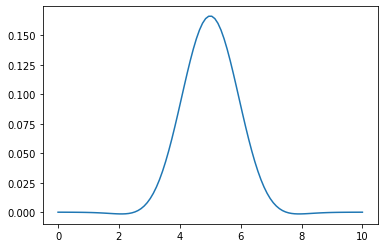

In [26]:
# 4th order cental spatial and 2nd order central temporal 
import numpy as np
from matplotlib import pyplot

L = 10 
T = 10  
c= 1.4 
N = 100 
h = L/N
M = 400 
k = T/M  
C = c*k/h 
Lf = 0.5
x = np.linspace(0,L,N)
t = np.linspace(0,T,M)
u = np.zeros(N)
un = np.zeros(N)

f = lambda x: np.exp(-0.5*(5-x)**2/.5/.5)*np.cos((x-5)*np.pi)
un[0:N] = f(x[0:N]) 



# scalar
for i in range(1,N-1):
    u[i] = (1-C**2)*un[i] + C**2*(un[i-1]+un[i+1])/2




for n in range(0,M):
    un = u.copy()
    unn = un.copy()
    for i in range(2,N-2):
        u[i] = -C**2/12*(un[i-2]+un[i+2]) + 4*C**2/3*(un[i-1]+un[i+1])+un[i]*(-5/2*C**2+2)-unn[i]

pyplot.plot(x,u)

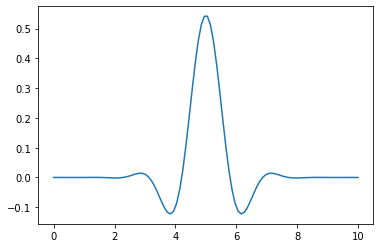

In [29]:
# 4th order Pade spatial and 2nd order central temporal 

# u_xx[t,i-1] + 10*u_xx[t,i] + u_xx[t,i+1] = 12/dx^2 (u[t,i-1] - 2u[t,i] + u[t,i+1])
# I literally discretized u_xx[t,i-1] , u_xx[t,i] , u_xx[t,i+1] again with 2nd order central difference and worked 
# out the algebra to compute this thing and I do not think it's the way to go. 

import numpy as np
from matplotlib import pyplot



L = 10 
T = 10  
c= 1.4 
N = 100 
h = L/N
M = 400 
k = T/M  
C = c*k/h 
Lf = 0.5
x = np.linspace(0,L,N)
t = np.linspace(0,T,M)
u = np.zeros(N)
un = np.zeros(N)

f = lambda x: np.exp(-0.5*(5-x)**2/.5/.5)*np.cos((x-5)*np.pi)
un[0:N] = f(x[0:N]) 





u[1:-1] = (1-C**2)*un[1:-1] + C**2*(un[0:-2]+un[2:])/2




for n in range(0,M):
    un = u.copy()
    unn = un.copy()
    for i in range(2,N-2):
        u[i] = -C**2*(un[i-2]-4*un[i-1]+6*un[i]-4*un[i+1]+un[i+2])+2*un[i] -unn[i]

pyplot.plot(x,u)

I do not think that this is the way to implement the Pade scheme... 
u_xx = 12[B(1,10,1)]^-1*[1/dx/dxB(1,-2,1)u] 
I think I should compute the inverse of the tridiagonal matrix first and just work things out.
The integration scheme is explicit and for this moment it is rather difficult to picture an nxn matrix especially since the 
problem at hand is 1-D